In [2]:
!unzip Gravity_Spy_Data.zip

Archive:  Gravity_Spy_Data.zip
  inflating: trainingset_v1d1_metadata.csv  


In [3]:
!pip install gwpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import os
import h5py as h5
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from os import listdir
import numpy as np

Install GWPy

In [5]:
#read the dataframe
df=pd.read_csv('trainingset_v1d1_metadata.csv')
df

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,...,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,...,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,...,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,...,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,...,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,...,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,Omicron,0,182,...,0,phase,-2.48491,K4lUik19zL,Extremely_Loud,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,Omicron,0,396,...,0,phase,1.32651,EkRSkrpPet,Helix,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,OMICRON,0,1817,...,0,phase,2.72929,xyLhvRKzzX,1080Lines,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,OMICRON,0,501,...,0,phase,0.66486,lshKvhcRcT,Violin_Mode,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


Import gwosc datasets to fetch the open-cource data

In [ ]:
print(df.keys())
df['confidence']

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')


0       0
1       0
2       0
3       0
4       0
       ..
7961    0
7962    0
7963    0
7964    0
7965    0
Name: confidence, Length: 7966, dtype: int64

In [6]:
from gwosc.datasets import event_gps

In [ ]:
#example of how to get the timeseries at a specific time
gps = event_gps("GW150914")
data = TimeSeries.fetch_open_data('L1', gps-5, gps+5)

Plot all the timeseries of the events in the dataframe

In [ ]:
print(df['event_time'][0])
print(df['start_time'][0])

1134216192.93164
1134216192


In [ ]:
len(df['event_time'])

7966

In [7]:
# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)
    print(Nt,dt,freqs,len(freqs))
    freqs1 = np.linspace(0,2048.,Nt//2+1)
    print(freqs1,len(freqs1))

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

In [8]:
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d

In [ ]:
gps=df['event_time'][256]
try:
  data=TimeSeries.fetch_open_data(df['ifo'][256], gps, gps+10)
except:
  data=[1,2,3,4,5]

In [ ]:
gps-1128348574.5

1453825.0205099583

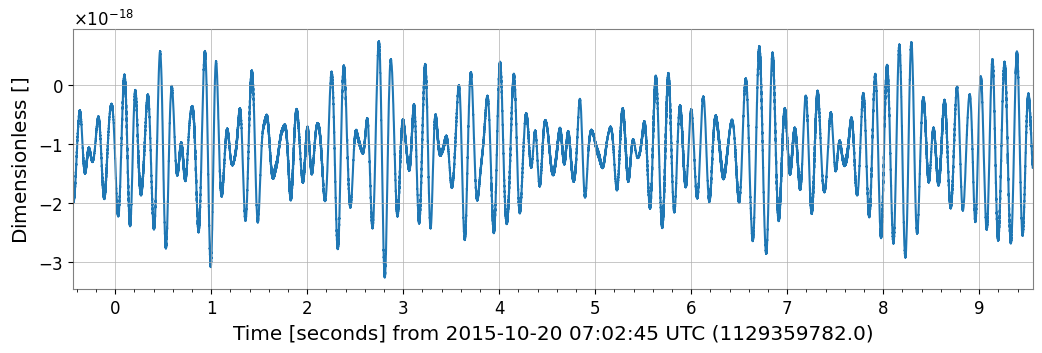

In [ ]:
data.plot()
plt.show()

In [ ]:
astropy.units.quantity.Quantity

In [ ]:
str(data[0])=='nan'

True

40960 0.000244140625 [0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481


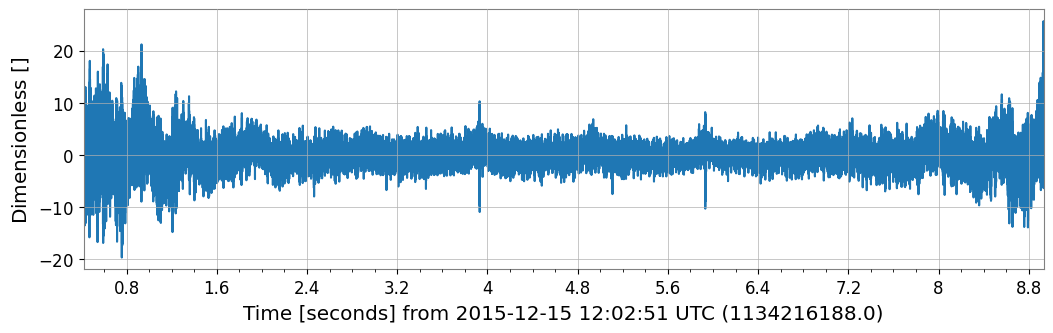

In [ ]:
fs=4096
dt=1.0 /fs
NFFT = int(4*fs)
Pxx, freqs=mlab.psd(data, Fs = fs, NFFT = NFFT)
psd = interp1d(freqs, Pxx)
whitened_data=whiten(data,psd,dt)[2000:36864]
whitened_data.plot()
plt.show()

In [ ]:
df['gravityspy_id']

0       zmIdpucyOG
1       zWFRqqDxwv
2       zKCTakFVcf
3       z14BdoiFZS
4       yyjqLCtAmO
           ...    
7961    K4lUik19zL
7962    EkRSkrpPet
7963    xyLhvRKzzX
7964    lshKvhcRcT
7965    rVtNKB41sZ
Name: gravityspy_id, Length: 7966, dtype: object

0
40960 0.000244140625 [0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
Whistle


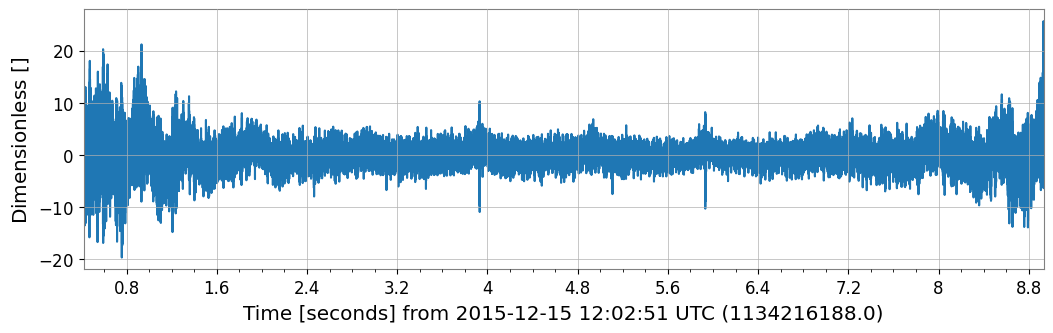

1
40960 0.000244140625 [0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
Whistle


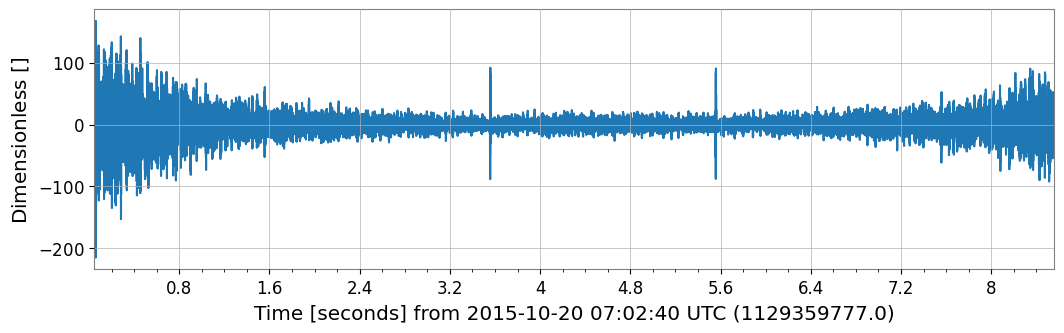

2
40960 0.000244140625 [0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
Whistle


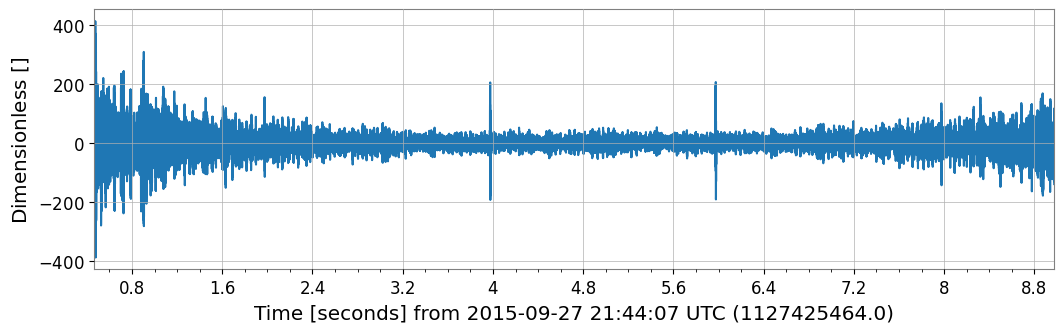

3
40960 0.000244140625 [0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0478e+03 2.0479e+03
 2.0480e+03] 20481
Whistle


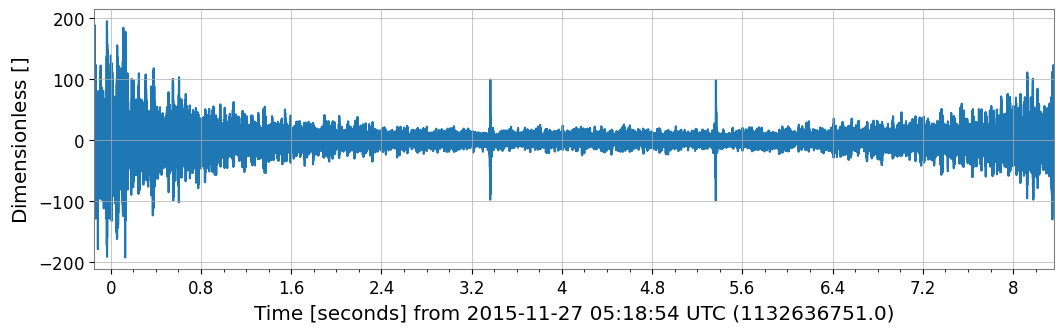

In [15]:
#setting the sampling rate and time intervals of the signals
fs=4096
dt=1.0 /fs
NFFT = int(4*fs)
stop_at=3
for i in range(len(df['event_time'])):
  print(i)
  gps=df['event_time'][i]
  try:
    #fetch the data corresponding to the gps time and whiten it
    data = TimeSeries.fetch_open_data(df['ifo'][i], gps-5, gps+5)
    #add a hack to discard timeseries with nan as elements
    if str(data[0])=='nan':
      pass
    else:
      Pxx, freqs=mlab.psd(data, Fs = fs, NFFT = NFFT)
      psd = interp1d(freqs, Pxx)
      #cut the extrema of the signal to avoid spurious detector effects
      whitened_data=whiten(data,psd,dt)[2000:36864]
      new_filename=df['gravityspy_id'][i]+'_whitened.h5'
      with h5.File('/content/sample_data/Gravity_Spy/'+new_filename, "w") as f:
        #create the new dataset and add the useful meta-data
        print(df['label'][i])
        dset = f.create_dataset(df['label'][i], (len(whitened_data),), dtype='f')
        dset[...] =whitened_data
        dset.attrs['sample_rate']=4096.0
        dset.attrs['t0']=df['event_time'][i]
      whitened_data.plot()
      plt.show()
  except:
      pass
  if i == stop_at:
          break 

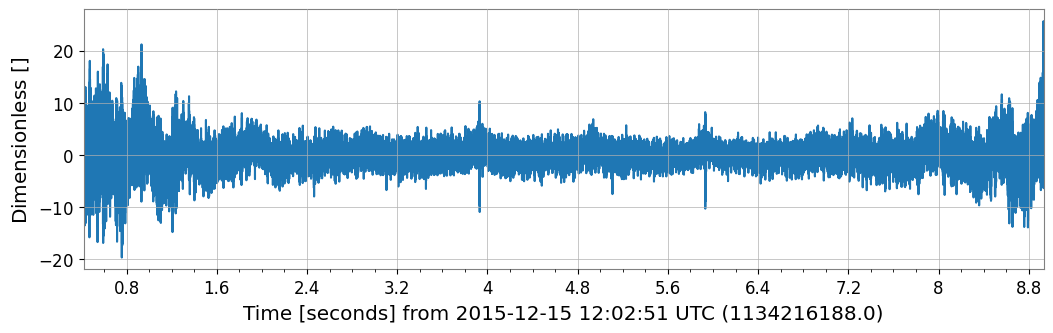

In [ ]:
whitened_data[2000:36864].plot()
plt.show()

In [ ]:
!zip -r /content/sample_data/Gravity_Spy_Glitches_1.zip /content/sample_data/Gravity_Spy

  adding: content/sample_data/Gravity_Spy/ (stored 0%)
  adding: content/sample_data/Gravity_Spy/qiOJvCXifs_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/i8B9fJ76WV_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/0v1QV37R4c_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/tchbkApLJb_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/pQiELkUGV5_whitened.h5 (deflated 9%)
  adding: content/sample_data/Gravity_Spy/rgxBEMihUv_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/mVDeJtzwbZ_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/cuiN0cvLl3_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/WSakzjRJ2x_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/hLHeshYD1B_whitened.h5 (deflated 8%)
  adding: content/sample_data/Gravity_Spy/f2G4fHG3cC_whitened.h5 (deflated 9%)
  adding: content/sample_data/Gravity_Spy/sEyEv3Kcqp_whitened.h5 (deflated 8

<KeysViewHDF5 ['Scratchy']>


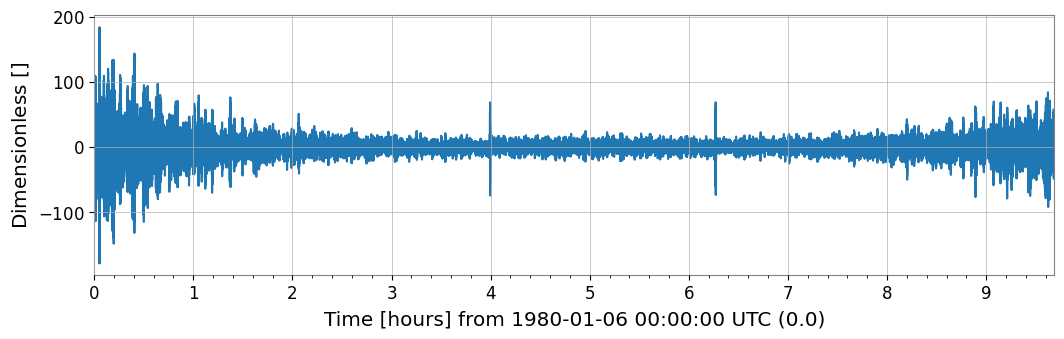

In [ ]:
fout=h5.File('/content/sample_data/Gravity_Spy/0z27Jglo70_whitened.h5','r') 
print(fout.keys())
dataset=fout['Scratchy']
t = TimeSeries(dataset[()])
t.plot()
plt.show()

In [17]:
fout=h5.File('/content/sample_data/Gravity_Spy/z14BdoiFZS_whitened.h5','r') 
#dataset=fout[]
print(fout.keys())

<KeysViewHDF5 ['Whistle']>


In [13]:
df['label'][1]

'Whistle'